# purpose

- this file uses the data fetched from a repository of your choice - [link](./../300-aggregate_data/readme.md)
- it uses this data to build graphs and visualizations on top of the extract of github issues
- this file contains some sample plots, you can plot your own


# setup processing


In [1]:
# import stuff

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import numpy as np

In [2]:
# load the CSV file
file_path = './../300-aggregate_data/360-paginate_data/366-aggregated_data.csv'

# load the data and ignore extra columns
df = pd.read_csv(file_path, usecols=['id', 'title', 'number', 'createdAt', 'closedAt', 'state', 'updatedAt', 'comments', 'labels'], low_memory=False)
df.head(1)

,id,title,number,createdAt,closedAt,state,updatedAt,comments,labels
0,MDU6SXNzdWUxMTU4ODYzMDI=,Add support for Python 3.x,1,2015-11-09T14:21:11Z,2015-12-08T00:03:00Z,CLOSED,2017-11-14T20:59:56Z,"Main things this involves: `print -> print()`,...",NaN


In [3]:
# date-time formatting

# convert to datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['closedAt'] = pd.to_datetime(df['closedAt'])

# set 'createdAt' as index for resampling
created_df = df.set_index('createdAt')
created_monthly = created_df.resample('ME').size()
created_weekly = created_df.resample('W').size()

# resample 'closedAt' using its own index
closed_df = df.set_index('closedAt')
closed_monthly = closed_df.resample('ME').size()
closed_weekly = closed_df.resample('W').size()

In [4]:
# calculate duration

df['closedAt'] = pd.to_datetime(df['closedAt'])
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['lifetime'] = df['closedAt'] - df['createdAt']
df['lifetime_days'] = df['lifetime'].dt.days

In [5]:
# calculate basic stats
min_duration = df['lifetime_days'].min()
max_duration = df['lifetime_days'].max()
mean_duration = df['lifetime_days'].mean()
median_duration = df['lifetime_days'].median()
std_duration = df['lifetime_days'].std()

# print the statistical analysis
print(f"minimum duration: {min_duration} days")
print(f"maximum duration: {max_duration} days")
print(f"mean duration: {mean_duration:.2f} days")
print(f"median duration: {median_duration} days")
print(f"standard deviation: {std_duration:.2f} days")

minimum duration: 0.0 days
maximum duration: 2977.0 days
mean duration: 265.56 days
median duration: 93.0 days
standard deviation: 417.75 days


# logged & closed trends

- what are the trends for issues getting logged (created/opened) and closed?


## weekly open/close trends

- **blue line (issues created)**
  - the blue line indicates the number of issues created each week
  - the line's trajectory helps identify periods of high activity or dips
- **green line (issues closed)**
  - the green line tracks the number of issues closed each week


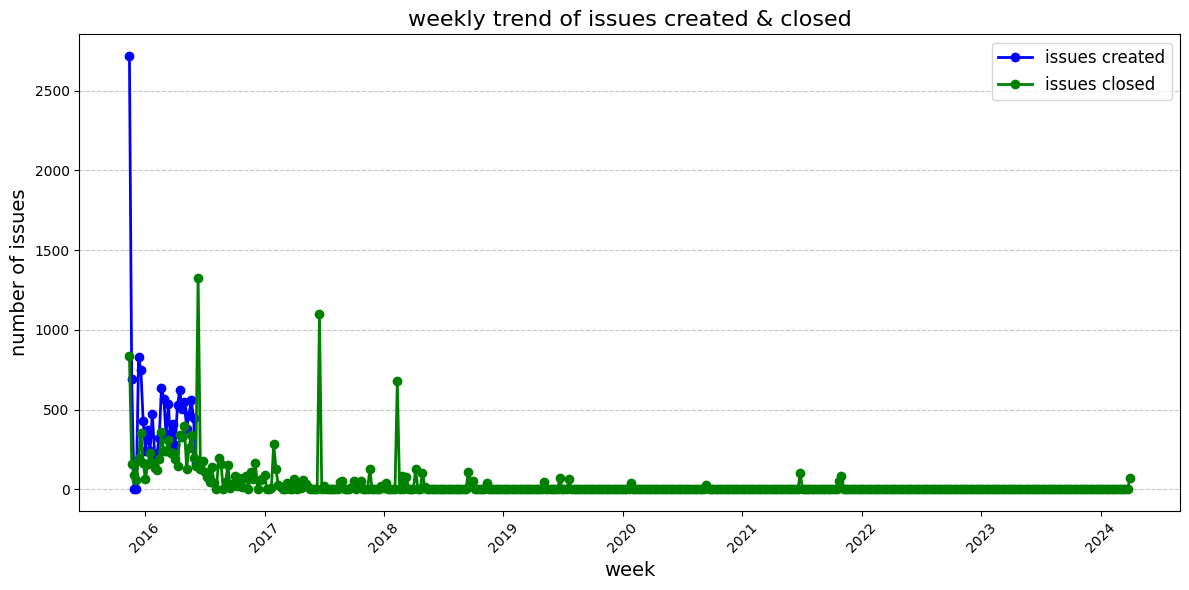

In [6]:
# plot the weekly trends

plt.figure(figsize=(12, 6))
plt.plot(created_weekly, label='issues created', marker='o', color='blue', linestyle='-', linewidth=2)
plt.plot(closed_weekly, label='issues closed', marker='o', color='green', linestyle='-', linewidth=2)
plt.title('weekly trend of issues created & closed', fontsize=16)
plt.xlabel('week', fontsize=14)
plt.ylabel('number of issues', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## monthly open/close trends


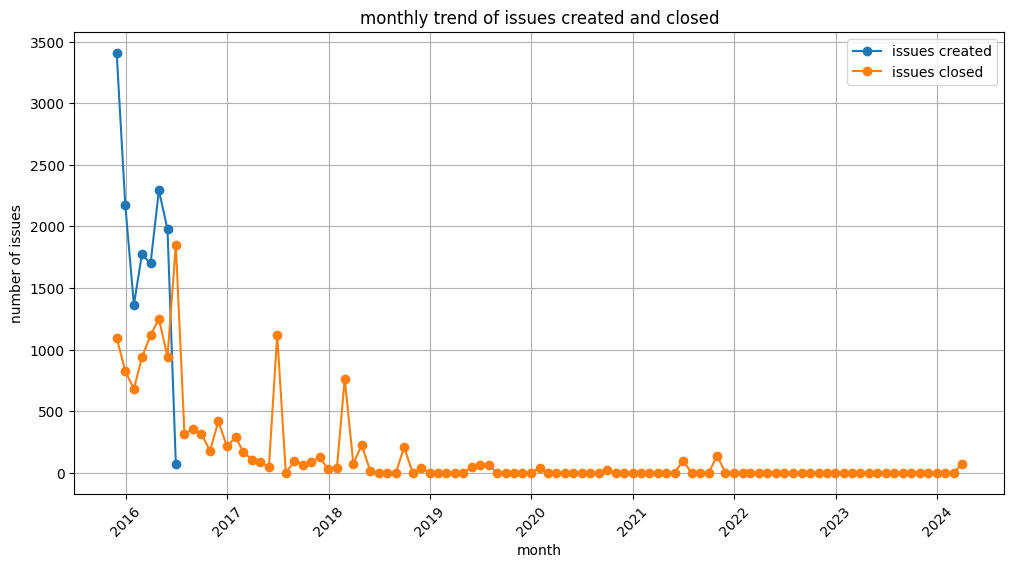

In [7]:
# plot the monthly trends
plt.figure(figsize=(12, 6))
plt.plot(created_monthly, label='issues created', marker='o')
plt.plot(closed_monthly, label='issues closed', marker='o')
plt.title('monthly trend of issues created and closed')
plt.xlabel('month')
plt.ylabel('number of issues')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# issue lifetime


## issue lifetime - histogram

- **frequency distribution**
  - the histogram below represents the number of issues falling within specified lifetime intervals
  - each bar's height indicates how many issues have a lifetime within that interval
- **bins and ranges**
  - the x-axis represents the lifetime in days, and the histogram divides it into 20 bins
  - each bin represents a specific range of days, and issues falling within that range contribute to the bar's height
- **central tendency and spread**
  - the plot shows the central tendency (where most issues lie) and the spread of the data
  - the concentration of bars in a particular region highlights the typical lifetime for most issues
- **skewness and outliers**
  - the distribution may show skewness, revealing whether most issues have shorter or longer lifetimes
  - any isolated bars far from the main concentration indicate outliers, representing issues that take significantly different times to be closed


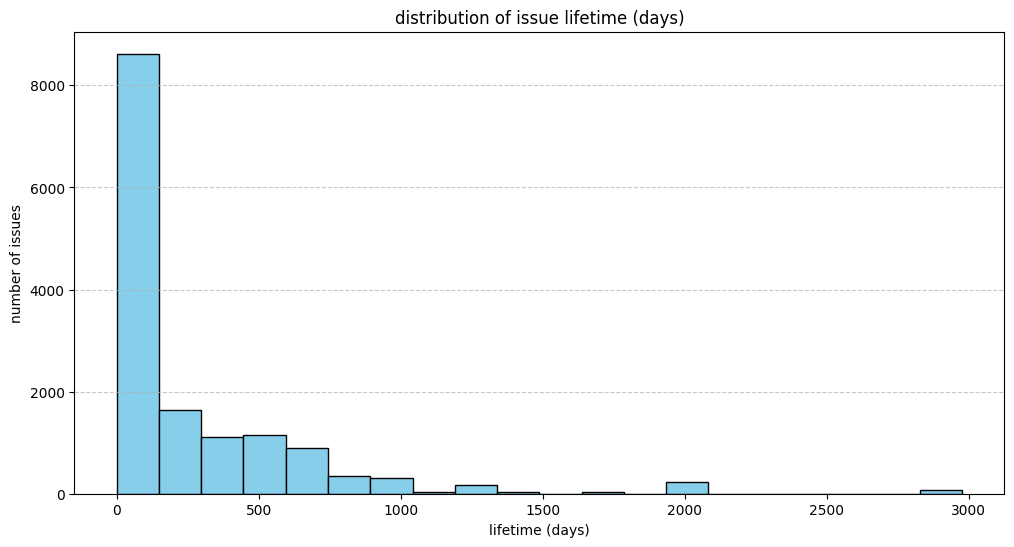

In [8]:
# plot lifetime distribution
plt.figure(figsize=(12, 6))
plt.hist(df['lifetime_days'], bins=20, color='skyblue', edgecolor='black')
plt.title('distribution of issue lifetime (days)')
plt.xlabel('lifetime (days)')
plt.ylabel('number of issues')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## issue lieftime - violin plot

- **intro**
  - the code below will create a violin plot
  - it gives a view of the distribution of issue lifetimes, measured in days
  - it combines the features of a box plot and a kernel density estimation (KDE) plot
- **density shape**
  - the width of the plot at different heights shows the density of data points, giving insights into the distribution of issue lifetimes
  - wider areas indicate a higher concentration of issues with similar lifetimes
- **box plot features**
  - within the violin plot, the black box plot lines display the following:
    - the `median` (thick horizontal line) represents the typical lifetime for most issues
    - the `interquartile range (IQR)` (the thinner boxes) represents the middle 50% of the data, highlighting where the majority of issues' lifetimes lie
    - the `whiskers` extend to show the range of lifetimes that lie within 1.5 times the IQR
- **outliers**
  - if there are points outside the whiskers, they represent outlier lifetimes that differ significantly from the median
- **summary**
  - in summary, the plot provides an in-depth view of how long issues typically remain open before being closed
  - it highlights the central tendency, variability, and the presence of any long-lived issues


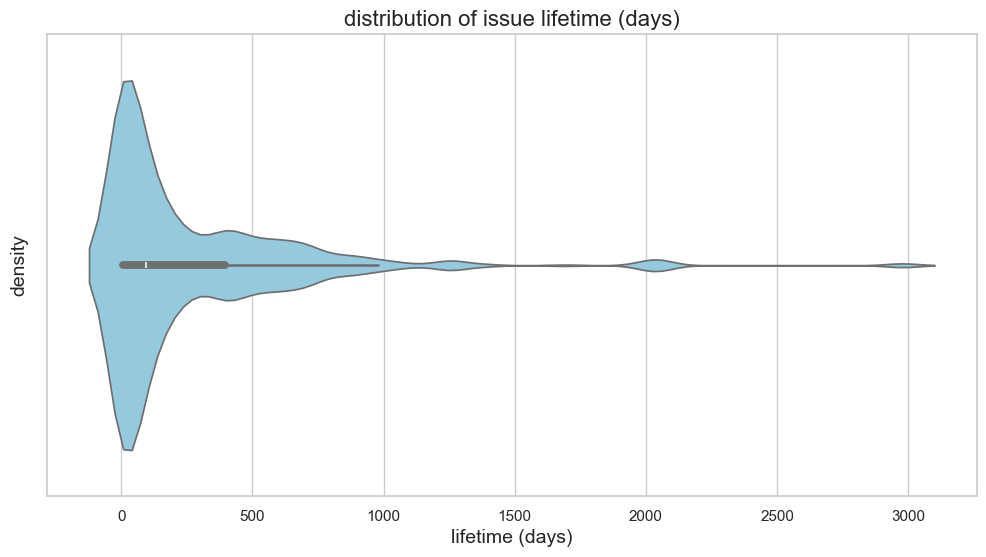

In [9]:
# Set the style
sns.set_theme(style='whitegrid')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create a violin plot to show the distribution of issue lifetimes
sns.violinplot(data=df, x='lifetime_days', inner='box', ax=ax, color='skyblue')

# Add labels and title
ax.set_title('distribution of issue lifetime (days)', fontsize=16)
ax.set_xlabel('lifetime (days)', fontsize=14)
ax.set_ylabel('density', fontsize=14)

plt.show()

# label plots

- github issue labels carry crucial information - [link](https://docs.github.com/en/graphql/reference/objects#label)
- see below some plots created using these labels


## label distribution plot

- this plot shows the frequency of issues for each label, providing an overview of the types of issues that frequently arise


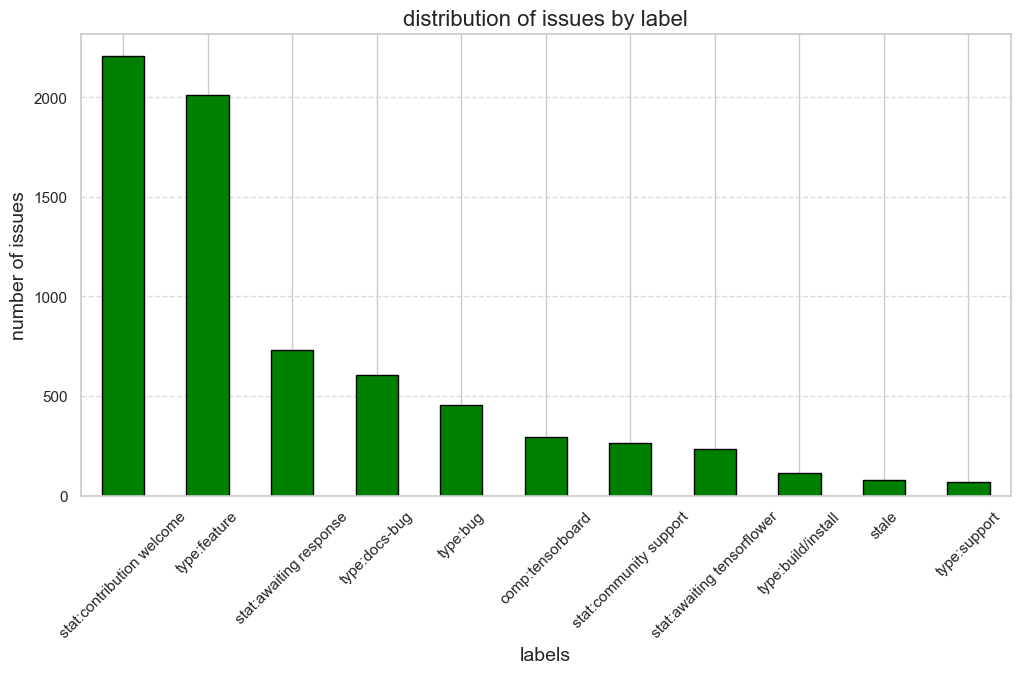

In [10]:
# label distribution plot

# count issues per label
label_counts = df['labels'].value_counts()

# plot the counts
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('distribution of issues by label', fontsize=16)
plt.xlabel('labels', fontsize=14)
plt.ylabel('number of issues', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## label vs. average lifetime plot

- this plot displays the average time of issues with specific labels remain open
- this helps to identify issue categories that are more challenging to resolve
- it calculates the average lifetime (in days) for issues assigned to each label


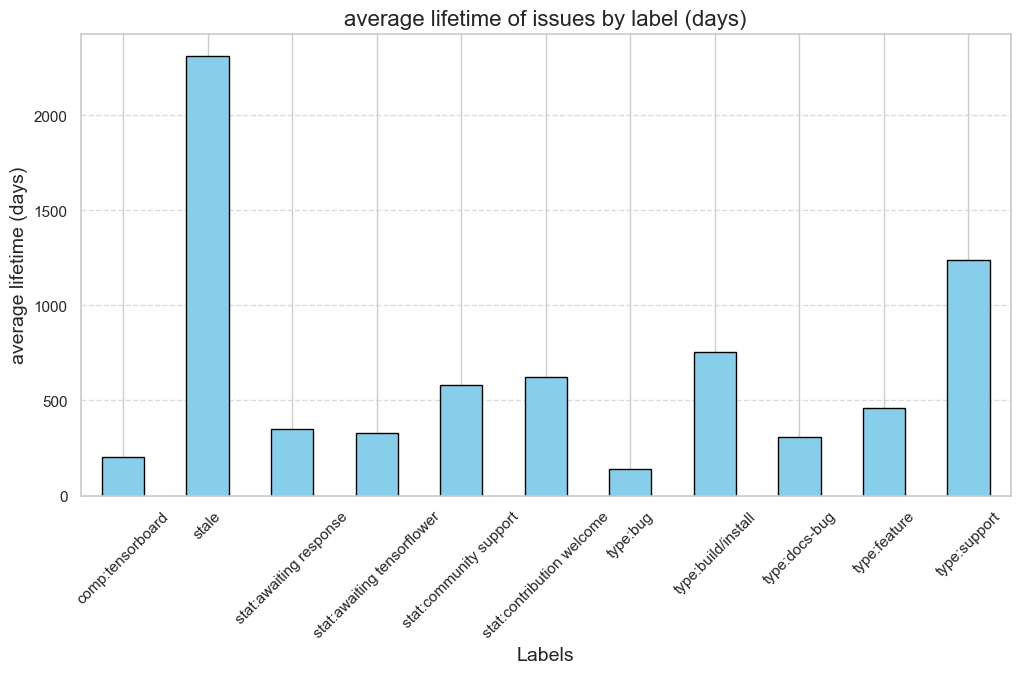

In [11]:
# label vs. average lifetime plot

# calculate the average lifetime for each label
df['lifetime_days'] = df['lifetime'].dt.days
label_lifetime = df.groupby('labels')['lifetime_days'].mean()

# plot the average lifetimes
plt.figure(figsize=(12, 6))
label_lifetime.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('average lifetime of issues by label (days)', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('average lifetime (days)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## issue states by label

- this plot displays the number of issues in different states for each label
- this allows you to identify which types of issues are more likely to remain unresolved
- the issues are grouped by label and state
- and the visualization counts those issues


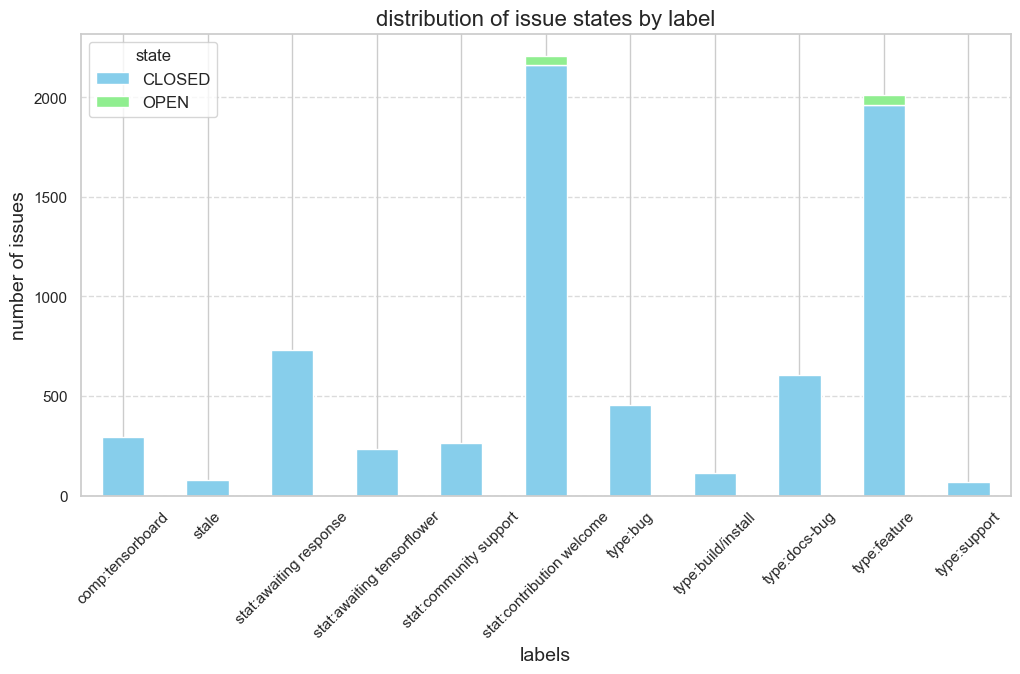

In [12]:
# issue states by label

# count issues for each label
label_state_counts = df.groupby(['labels', 'state']).size().unstack(fill_value=0)

# plot the stacked bar chart
label_state_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen', 'coral'])
plt.title('distribution of issue states by label', fontsize=16)
plt.xlabel('labels', fontsize=14)
plt.ylabel('number of issues', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='state', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# comment plots

- github issue comments carry crucial information - [link](https://docs.github.com/en/graphql/reference/objects#issuecomment)
- see below some plots created using these comments and their contents


## comments by issue labels

- this plot shows issues with which labels usually have a lot of comments associated with them


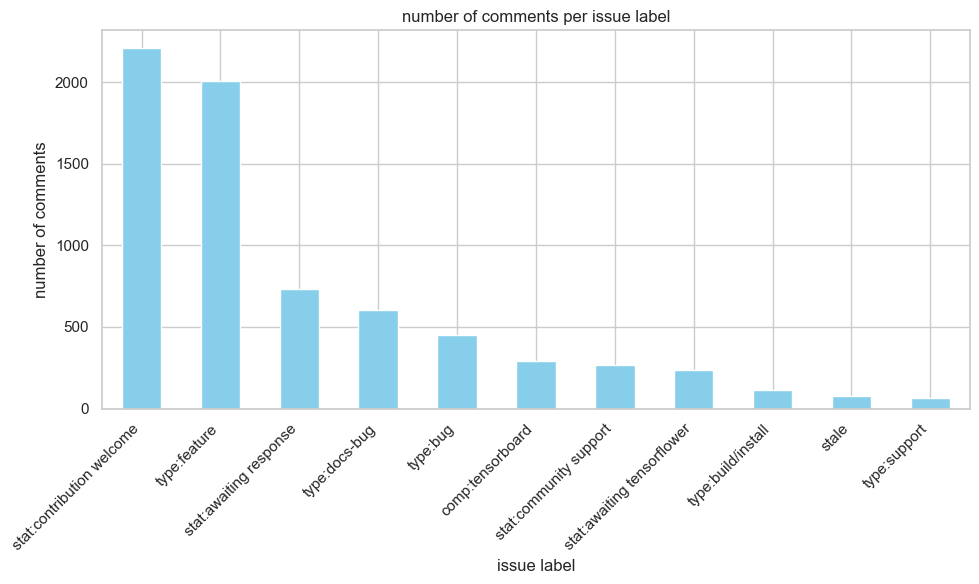

In [13]:
# comments by issue labels

# clean the data by removing rows where labels are NaN
df_clean = df.dropna(subset=['labels'])

# group by labels and count the comments
comments_per_label = df_clean.groupby('labels')['comments'].count()

# sort the results to improve readability
comments_per_label = comments_per_label.sort_values(ascending=False)

# plot the data
plt.figure(figsize=(10, 6))
comments_per_label.plot(kind='bar', color='skyblue')
plt.title('number of comments per issue label')
plt.xlabel('issue label')
plt.ylabel('number of comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()